In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

from keras import backend as K
K.set_image_dim_ordering('th')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
import os
# import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
/Users/sachaura/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/sachaura/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# number of channels
img_channels = 1

In [3]:
path1 = '/home/saumya/Desktop/Telugu/telgu_dataset'    #path of folder of images
data_path = '/Users/sachaura/Documents/nm/ThesisWork/Bangla'    #path of folder of images

# listing = os.listdir(path1) 
# num_samples=size(listing)
# print (num_samples)
#for file in listing:
    #im = Image.open(path1 + '/' + file)  
    #img = im.resize((img_rows,img_cols))
    #gray = img.convert('L')
                #need to do some more processing here          
    #gray.save(path2 +'/' +  file, "bmp")

imlist = os.listdir(data_path)
data_dir_list = os.listdir(data_path)

In [4]:
im1 = array(Image.open('/Users/sachaura/Downloads/bangla' + '/'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2]# get the size of the images
print(m,n)
imnbr = len(imlist) # get the number of images

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sachaura/Downloads/bangla/.DS_Store'

In [5]:
num_channel=1
num_epoch=1

# Define the number of classes

img_data_list=[]
for dataset in data_dir_list:
    if(dataset != ".DS_Store"):
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(28,28))
            img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		
num_classes = 10

num_of_samples = img_data.shape[0]
label = np.ones((num_of_samples,),dtype='int64')

Loaded the images of dataset-0

Loaded the images of dataset-1

Loaded the images of dataset-2

Loaded the images of dataset-3

Loaded the images of dataset-4

Loaded the images of dataset-5

Loaded the images of dataset-6

Loaded the images of dataset-7

Loaded the images of dataset-8

Loaded the images of dataset-9

(19392, 28, 28)
(19392, 1, 28, 28)


[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
label :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


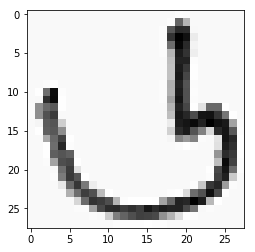

In [6]:
# # create matrix to store all flattened images
# immatrix = array([array(Image.open('/home/saumya/Desktop/Telugu/t' + '/'+  im2)).flatten()
#               for im2 in imlist],'f')
# #print(immatrix)
# num_class=10
               
# label=np.ones((num_samples,),dtype = int)
label[1:1934]=0
label[1934:3879]=1
label[3879:5824]=2
label[5824:7780]=3
label[7780:9725]=4
label[9725:11658]=5
label[11658:13588]=6
label[13588:15516]=7
label[15516:17448]=8
label[17448:19392]=9

names = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
# Y = np_utils.to_categorical(label, num_class)
# data,Label = shuffle(immatrix,Y, random_state=2)
# train_data = [data,Label]
# np.savetxt('/home/saumya/Desktop/svm_input_data/ny_test.csv', Label, delimiter = ',') 
# img=immatrix[17].reshape(img_rows,img_cols)
# plt.imshow(img)
# plt.show()

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(label, num_classes)
print(Y)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

i = 167
plt.imshow(X_train[i, 0], interpolation='nearest' , cmap = 'gray')
print("label : ", y_train[i,:])


input_shape=img_data[0].shape

In [7]:
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
# model.add(Convolution2D(64, 3, 3))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, name = 'first_dense_layer'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [8]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 28, 28)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 28, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 26, 26)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 26, 26)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 13, 13)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 13, 13)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 11, 11)        18496     
__________

NameError: name 'plot_model' is not defined

In [9]:

# Training
hist = model.fit(X_train, y_train, batch_size=64, nb_epoch=10, verbose=1, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

/Users/sachaura/anaconda3/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 15513 samples, validate on 3879 samples
Epoch 1/10
15513/15513 [==============================] - 88s - loss: 0.9162 - acc: 0.6975 - val_loss: 0.2586 - val_acc: 0.9193
Epoch 2/10
15513/15513 [==============================] - 110s - loss: 0.3527 - acc: 0.8889 - val_loss: 0.1701 - val_acc: 0.9453
Epoch 3/10
15513/15513 [==============================] - 105s - loss: 0.2681 - acc: 0.9190 - val_loss: 0.1719 - val_acc: 0.9453
Epoch 4/10
15513/15513 [==============================] - 102s - loss: 0.2253 - acc: 0.9308 - val_loss: 0.1065 - val_acc: 0.9665
Epoch 5/10
15513/15513 [==============================] - 111s - loss: 0.1931 - acc: 0.9416 - val_loss: 0.0983 - val_acc: 0.9683
Epoch 6/10
15513/15513 [==============================] - 116s - loss: 0.1793 - acc: 0.9449 - val_loss: 0.0907 - val_acc: 0.9724
Epoch 7/10
15513/15513 [==============================] - 132s - loss: 0.1626 - acc: 0.9513 - val_loss: 0.0788 - val_acc: 0.9745
Epoch 8/10
15513/15513 [=========================

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07625252392587664
Test accuracy: 0.9791183294663574


In [16]:
score = model.evaluate(X_test, y_test, verbose=0)

test_image = X_test[120:121]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[120:121])

(1, 1, 28, 28)
[[2.05156743e-03 4.89622616e-05 9.27749905e-04 7.71456771e-03
  1.06437525e-04 9.43040967e-01 4.45961729e-02 1.34434714e-03
  1.38767893e-04 3.03066136e-05]]
1/1 [==============================] - 0s
[5]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [24]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
# print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4', 'class 5', 'class 6','class 7','class 8', 'class 9']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

             precision    recall  f1-score   support

    class 0       0.98      1.00      0.99       428
    class 1       0.93      0.98      0.95       396
    class 2       0.99      0.98      0.99       377
    class 3       0.97      0.99      0.98       411
    class 4       0.99      0.98      0.98       380
    class 5       0.97      0.98      0.97       374
    class 6       0.99      0.97      0.98       357
    class 7       0.99      1.00      1.00       366
    class 8       0.98      1.00      0.99       387
    class 9       0.99      0.93      0.96       403

avg / total       0.98      0.98      0.98      3879

[[427   0   0   0   0   1   0   0   0   0]
 [  2 389   0   0   3   0   0   0   1   1]
 [  0   3 370   0   0   1   0   1   0   2]
 [  1   0   0 406   0   2   1   0   0   1]
 [  0   2   2   0 371   3   0   1   1   0]
 [  3   1   0   0   0 365   2   0   3   0]
 [  0   0   0   9   0   3 345   0   0   0]
 [  0   0   0   0   0   0   0 365   1   0]
 [  0   0   0   0

Confusion matrix, without normalization
[[427   0   0   0   0   1   0   0   0   0]
 [  2 389   0   0   3   0   0   0   1   1]
 [  0   3 370   0   0   1   0   1   0   2]
 [  1   0   0 406   0   2   1   0   0   1]
 [  0   2   2   0 371   3   0   1   1   0]
 [  3   1   0   0   0 365   2   0   3   0]
 [  0   0   0   9   0   3 345   0   0   0]
 [  0   0   0   0   0   0   0 365   1   0]
 [  0   0   0   0   0   1   0   0 386   0]
 [  2  24   1   2   0   0   0   0   0 374]]


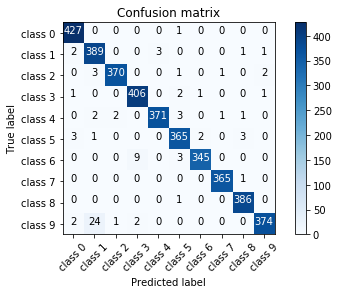

In [26]:
import matplotlib.pyplot as plt
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

In [27]:
import numpy
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from cv2 import CV_64F
K.set_image_dim_ordering('th')

In [29]:
model_dense_layer_output = Model(input=model.input, output=model.get_layer('first_dense_layer').output)
svm_x_train = model_dense_layer_output.predict(X_train)
svm_x_test = model_dense_layer_output.predict(X_test)
svm_y_train = model.predict_classes(X_train)
svm_y_test = model.predict_classes(X_test)

# svm_y_train = np.array([x[0] for x in y_train])
# svm_y_test = np.array([x[0] for x in y_test])

# np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_x_train.csv', svm_x_train, delimiter = ',') 
# np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_y_train.csv', svm_y_train, delimiter = ',') 
# np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_x_test.csv', svm_x_test, delimiter = ',') 
# np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_y_test.csv', svm_y_test, delimiter = ',') 

print(svm_x_train)

/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("fi...)`
  """Entry point for launching an IPython kernel.


3872/3879 [============================>.] - ETA: 0s[[ 1.08  0.55 -1.04 ... -0.85 -1.51  1.25]
 [-0.29 -0.94  0.61 ... -0.75  0.81 -0.62]
 [-1.31 -1.69 -0.01 ... -1.4   2.36 -1.06]
 ...
 [ 1.1  -0.48 -0.68 ... -0.22  2.24 -1.12]
 [-1.22  0.64 -0.42 ...  1.84 -1.7  -1.02]
 [ 1.28  0.17 -0.38 ... -0.69  1.45 -0.15]]


In [61]:
import pandas as pd
data = pd.DataFrame({"0":[1,0,0,0,0,0,0,0,0,0],"1":[0,1,0,0,0,0,0,0,0,0],"2":[0,0,1,0,0,0,0,0,0,0],"3":[0,0,0,1,0,0,0,0,0,0],"4":[0,0,0,0,1,0,0,0,0,0],"5":[0,0,0,0,0,1,0,0,0,0],"6":[0,0,0,0,0,0,1,0,0,0],"7":[0,0,0,0,0,0,0,1,0,0],"8":[0,0,0,0,0,0,0,0,1,0],"9":[0,0,0,0,0,0,0,0,0,1]})

def get_animal(row):
    for c in data.columns:
        if row[c]==1:
            return c

In [64]:
Y.apply(get_animal, axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [30]:
from cv2 import CV_64F
import cv2
from sklearn import svm
from sklearn import metrics
import random
import json
from keras.models import model_from_json

from sklearn.ensemble import RandomForestClassifier

In [31]:
clf = svm.LinearSVC()
clf.fit(svm_x_train, svm_y_train)

y_predicted = clf.predict(svm_x_test)

[[430   1   0   0   0   2   0   2   0   0]
 [  0 413   0   0   2   0   0   0   0   4]
 [  0   0 371   0   0   0   0   0   0   2]
 [  0   0   0 410   0   1   4   0   0   2]
 [  0   1   0   0 373   0   0   0   0   0]
 [  0   0   2   1   1 371   1   0   0   0]
 [  0   0   0   0   0   0 347   0   0   1]
 [  0   0   0   0   2   0   0 365   0   0]
 [  0   0   0   0   1   0   0   0 391   0]
 [  0   2   1   0   0   0   0   0   0 375]]
Confusion matrix, without normalization
[[430   1   0   0   0   2   0   2   0   0]
 [  0 413   0   0   2   0   0   0   0   4]
 [  0   0 371   0   0   0   0   0   0   2]
 [  0   0   0 410   0   1   4   0   0   2]
 [  0   1   0   0 373   0   0   0   0   0]
 [  0   0   2   1   1 371   1   0   0   0]
 [  0   0   0   0   0   0 347   0   0   1]
 [  0   0   0   0   2   0   0 365   0   0]
 [  0   0   0   0   1   0   0   0 391   0]
 [  0   2   1   0   0   0   0   0   0 375]]
Accuracy:  0.991492652745553


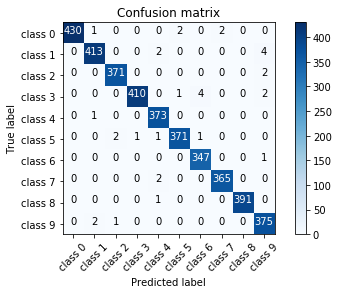

In [37]:
accuracy = metrics.accuracy_score(svm_y_test, y_predicted)
cm = metrics.confusion_matrix(svm_y_test, y_predicted)
print(cm)
# plt.imshow(cm)

cm = metrics.confusion_matrix(svm_y_test, y_predicted)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4', 'class 5', 'class 6','class 7','class 8', 'class 9']
plot_confusion_matrix(cm, classes=target_names,
                      title='Confusion matrix')
print("Accuracy: ",accuracy)

In [38]:
clf = svm.SVC()
clf.fit(svm_x_train, svm_y_train)

y_predicted = clf.predict(svm_x_test)

Confusion matrix, without normalization
[[430   1   0   0   0   2   0   2   0   0]
 [  0 413   0   0   2   0   0   0   0   4]
 [  0   0 371   0   0   0   0   0   0   2]
 [  0   0   0 410   0   1   4   0   0   2]
 [  0   1   0   0 373   0   0   0   0   0]
 [  0   0   2   1   1 371   1   0   0   0]
 [  0   0   0   0   0   0 347   0   0   1]
 [  0   0   0   0   2   0   0 365   0   0]
 [  0   0   0   0   1   0   0   0 391   0]
 [  0   2   1   0   0   0   0   0   0 375]]
Accuracy:  0.991492652745553


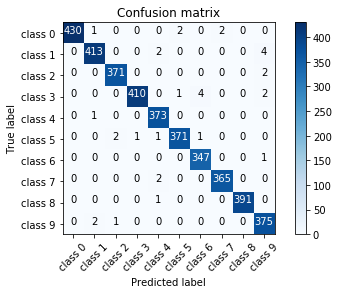

In [39]:
accuracy = metrics.accuracy_score(svm_y_test, y_predicted)

cm = metrics.confusion_matrix(svm_y_test, y_predicted)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4', 'class 5', 'class 6','class 7','class 8', 'class 9']
plot_confusion_matrix(cm, classes=target_names,
                      title='Confusion matrix')
print("Accuracy: ",accuracy)

In [40]:
clf = RandomForestClassifier(n_estimators = 75, n_jobs=10, random_state=0)
clf.fit(svm_x_train,svm_y_train)
predicted_output = clf.predict(svm_x_test)

In [36]:
total_test_samples = svm_y_test.shape[0]
correct_predictions=0

for i in range(0,total_test_samples):
    if(predicted_output[i]==svm_y_test[i]):
        correct_predictions+=1
        
accuracy=correct_predictions/(total_test_samples*1.0)
print("Accuracy:",accuracy)

Accuracy: 0.9889146687290539


In [43]:
print(svm_y_train)

[ 1.  0.  0. ...,  0.  0.  0.]


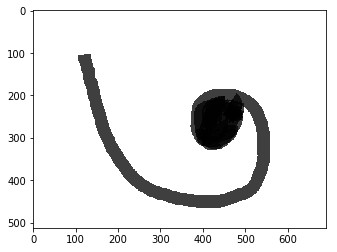

(28, 28)
(1, 1, 28, 28)
[[2.70e-05 1.03e-04 2.86e-06 9.66e-01 1.90e-06 5.73e-04 3.27e-02 2.59e-07
  2.35e-04 1.02e-04]]
1/1 [==============================] - 0s
[3]


In [62]:
# Testing a new image
test_image = cv2.imread('/Users/sachaura/Downloads/digits/3_b.png')
plt.imshow(test_image)
plt.show()
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
# Predicting the test image
print((model.predict(test_image)))

print(model.predict_classes(test_image))

(1, 1, 32, 26, 26)
(32, 26, 26)


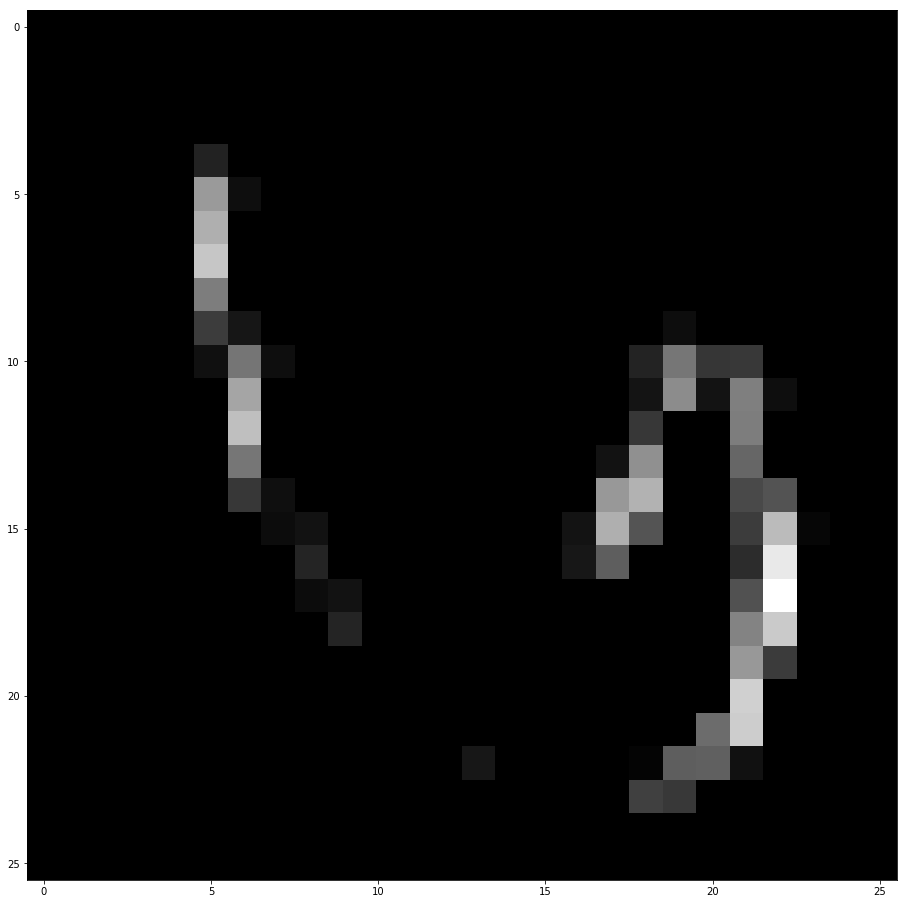

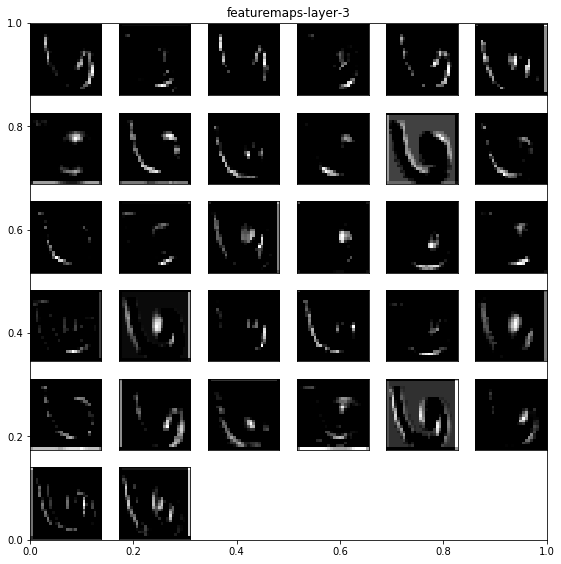

[[2.70e-05 1.03e-04 2.86e-06 9.66e-01 1.90e-06 5.73e-04 3.27e-02 2.59e-07
  2.35e-04 1.02e-04]]
[3]


In [63]:


# Visualizing the intermediate layer
#
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]  
# print (feature_maps)
print (np.shape(feature_maps))
if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2, 0)),2, 0)
# print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(8,8))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
# 	ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

# Predicting the test image
print((model.predict(test_image)))
svm_x = model_dense_layer_output.predict(test_image)
# print(model.predict_classes(test_image))
print(clf.predict(svm_x))

Automatically created module for IPython interactive environment


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10124f660, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/sachaura/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/sacha.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10124f660, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/sachaura/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/sacha.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'print(__doc__)\n\nimport numpy as np\nimport matplo..., x, y, (0.7, 1.01), cv=cv, n_jobs=4)\n\nplt.show()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 14, 17, 37, 35, 989087, tzinfo=tzutc()), 'msg_id': '70a1457c59da46138c8f933159d738da', 'msg_type': 'execute_request', 'session': '1589c210f97b480da23644f1c3ec9fc9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '70a1457c59da46138c8f933159d738da', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'1589c210f97b480da23644f1c3ec9fc9']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'print(__doc__)\n\nimport numpy as np\nimport matplo..., x, y, (0.7, 1.01), cv=cv, n_jobs=4)\n\nplt.show()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 14, 17, 37, 35, 989087, tzinfo=tzutc()), 'msg_id': '70a1457c59da46138c8f933159d738da', 'msg_type': 'execute_request', 'session': '1589c210f97b480da23644f1c3ec9fc9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '70a1457c59da46138c8f933159d738da', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'1589c210f97b480da23644f1c3ec9fc9'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'print(__doc__)\n\nimport numpy as np\nimport matplo..., x, y, (0.7, 1.01), cv=cv, n_jobs=4)\n\nplt.show()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 14, 17, 37, 35, 989087, tzinfo=tzutc()), 'msg_id': '70a1457c59da46138c8f933159d738da', 'msg_type': 'execute_request', 'session': '1589c210f97b480da23644f1c3ec9fc9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '70a1457c59da46138c8f933159d738da', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='print(__doc__)\n\nimport numpy as np\nimport matplo..., x, y, (0.7, 1.01), cv=cv, n_jobs=4)\n\nplt.show()', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'print(__doc__)\n\nimport numpy as np\nimport matplo..., x, y, (0.7, 1.01), cv=cv, n_jobs=4)\n\nplt.show()'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('print(__doc__)\n\nimport numpy as np\nimport matplo..., x, y, (0.7, 1.01), cv=cv, n_jobs=4)\n\nplt.show()',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('print(__doc__)\n\nimport numpy as np\nimport matplo..., x, y, (0.7, 1.01), cv=cv, n_jobs=4)\n\nplt.show()',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='print(__doc__)\n\nimport numpy as np\nimport matplo..., x, y, (0.7, 1.01), cv=cv, n_jobs=4)\n\nplt.show()', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>, <_ast.Import object>, <_ast.Import object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.FunctionDef object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-54-834e94a6da9a>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1c2fc4f4a8, execution..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1c2f5f50c0, file "<ipython-input-54-834e94a6da9a>", line 92>
        result = <ExecutionResult object at 1c2fc4f4a8, execution..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1c2f5f50c0, file "<ipython-input-54-834e94a6da9a>", line 92>, result=<ExecutionResult object at 1c2fc4f4a8, execution..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1c2f5f50c0, file "<ipython-input-54-834e94a6da9a>", line 92>
        self.user_global_ns = {'ALLOW_THREADS': 1, 'Activation': <class 'keras.layers.core.Activation'>, 'AxisError': <class 'numpy.core._internal.AxisError'>, 'BUFSIZE': 8192, 'CLIP': 0, 'CV_64F': 6, 'ComplexWarning': <class 'numpy.core.numeric.ComplexWarning'>, 'Conv2D': <class 'keras.layers.convolutional.Conv2D'>, 'Convolution2D': <class 'keras.layers.convolutional.Conv2D'>, 'DataSource': <class 'numpy.lib._datasource.DataSource'>, ...}
        self.user_ns = {'ALLOW_THREADS': 1, 'Activation': <class 'keras.layers.core.Activation'>, 'AxisError': <class 'numpy.core._internal.AxisError'>, 'BUFSIZE': 8192, 'CLIP': 0, 'CV_64F': 6, 'ComplexWarning': <class 'numpy.core.numeric.ComplexWarning'>, 'Conv2D': <class 'keras.layers.convolutional.Conv2D'>, 'Convolution2D': <class 'keras.layers.convolutional.Conv2D'>, 'DataSource': <class 'numpy.lib._datasource.DataSource'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/Users/sachaura/Downloads/<ipython-input-54-834e94a6da9a> in <module>()
     87 # Cross validation with 100 iterations to get smoother mean test and train
     88 # score curves, each time with 20% data randomly selected as a validation set.
     89 cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
     90 
     91 estimator = GaussianNB()
---> 92 plot_learning_curve(estimator, title, x, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
     93 
     94 title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
     95 # SVC is more expensive so we do a lower number of CV iterations:
     96 cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

...........................................................................
/Users/sachaura/Downloads/<ipython-input-54-834e94a6da9a> in plot_learning_curve(estimator=GaussianNB(priors=None), title='Learning Curves (Naive Bayes)', X=array([[[[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1. ..., 1.  , ..., 1.  , 1.  , 1.  ]]]], dtype=float32), y=array([[0., 0., 0., ..., 0., 0., 1.],
       [0...., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]]), ylim=(0.7, 1.01), cv=ShuffleSplit(n_splits=100, random_state=0, test_size=0.2, train_size=None), n_jobs=4, train_sizes=array([0.1 , 0.33, 0.55, 0.78, 1.  ]))
     56     if ylim is not None:
     57         plt.ylim(*ylim)
     58     plt.xlabel("Training examples")
     59     plt.ylabel("Score")
     60     train_sizes, train_scores, test_scores = learning_curve(
---> 61         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
     62     train_scores_mean = np.mean(train_scores, axis=1)
     63     train_scores_std = np.std(train_scores, axis=1)
     64     test_scores_mean = np.mean(test_scores, axis=1)
     65     test_scores_std = np.std(test_scores, axis=1)

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in learning_curve(estimator=GaussianNB(priors=None), X=array([[[[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1. ..., 1.  , ..., 1.  , 1.  , 1.  ]]]], dtype=float32), y=array([[0., 0., 0., ..., 0., 0., 1.],
       [0...., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]]), groups=None, train_sizes=array([0.1 , 0.33, 0.55, 0.78, 1.  ]), cv=ShuffleSplit(n_splits=100, random_state=0, test_size=0.2, train_size=None), scoring=None, exploit_incremental_learning=False, n_jobs=4, pre_dispatch='all', verbose=0, shuffle=False, random_state=None)
   1123                 train_test_proportions.append((train[:n_train_samples], test))
   1124 
   1125         out = parallel(delayed(_fit_and_score)(
   1126             clone(estimator), X, y, scorer, train, test,
   1127             verbose, parameters=None, fit_params=None, return_train_score=True)
-> 1128             for train, test in train_test_proportions)
        train = array([ 3928, 12466, 18950, ..., 18859, 18660,  4249])
        test = array([19039,  4031,  8139, ...,  2948, 18116,  3791])
        train_test_proportions = [(array([18311,  6201,  6008, ...,  5143,  5068,  6165]), array([19348,   998, 10685, ..., 12199, 19155,  3161])), (array([18311,  6201,  6008, ...,   728,  2708,  7384]), array([19348,   998, 10685, ..., 12199, 19155,  3161])), (array([18311,  6201,  6008, ..., 18536,  5313, 13475]), array([19348,   998, 10685, ..., 12199, 19155,  3161])), (array([18311,  6201,  6008, ...,  8229, 13321, 12485]), array([19348,   998, 10685, ..., 12199, 19155,  3161])), (array([18311,  6201,  6008, ...,  9845, 10799,  2732]), array([19348,   998, 10685, ..., 12199, 19155,  3161])), (array([17601, 10343, 17360, ..., 13915,  2591, 14453]), array([ 6245, 17014,  9533, ..., 19068,  6921,  8516])), (array([17601, 10343, 17360, ...,  4544,  6195,  8360]), array([ 6245, 17014,  9533, ..., 19068,  6921,  8516])), (array([17601, 10343, 17360, ...,  1057,  6293,  8193]), array([ 6245, 17014,  9533, ..., 19068,  6921,  8516])), (array([17601, 10343, 17360, ...,  5586, 12516,  1427]), array([ 6245, 17014,  9533, ..., 19068,  6921,  8516])), (array([17601, 10343, 17360, ...,  9688, 16978, 18872]), array([ 6245, 17014,  9533, ..., 19068,  6921,  8516])), (array([15385, 18427, 13169, ...,  8850,  3696, 18530]), array([10808,  8898,  4992, ...,   853, 12535, 14541])), (array([15385, 18427, 13169, ..., 11794,   589,  9990]), array([10808,  8898,  4992, ...,   853, 12535, 14541])), (array([15385, 18427, 13169, ...,  1032,  8973, 10370]), array([10808,  8898,  4992, ...,   853, 12535, 14541])), (array([15385, 18427, 13169, ...,   992, 10183, 15791]), array([10808,  8898,  4992, ...,   853, 12535, 14541])), (array([15385, 18427, 13169, ..., 12668,  8529, 12833]), array([10808,  8898,  4992, ...,   853, 12535, 14541])), (array([ 4853, 15079, 16771, ..., 14443, 11580,  5031]), array([15485, 19165,  6377, ...,   854, 16507, 18466])), (array([ 4853, 15079, 16771, ...,  4889, 17514, 16309]), array([15485, 19165,  6377, ...,   854, 16507, 18466])), (array([ 4853, 15079, 16771, ...,  5381,  8766, 10162]), array([15485, 19165,  6377, ...,   854, 16507, 18466])), (array([ 4853, 15079, 16771, ..., 10292, 17459, 18104]), array([15485, 19165,  6377, ...,   854, 16507, 18466])), (array([ 4853, 15079, 16771, ...,  7556,   111, 14379]), array([15485, 19165,  6377, ...,   854, 16507, 18466])), ...]
   1129         out = np.array(out)
   1130         n_cv_folds = out.shape[0] // n_unique_ticks
   1131         out = out.reshape(n_cv_folds, n_unique_ticks, 2)
   1132 

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object learning_curve.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Thu Jun 14 23:07:36 2018
PID: 4183                Python 3.6.4: /Users/sachaura/anaconda3/bin/python
...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (GaussianNB(priors=None), memmap([[[[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1...., 1.  , ..., 1.  , 1.  , 1.  ]]]], dtype=float32), memmap([[0., 0., 0., ..., 0., 0., 1.],
        [... 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]), <function _passthrough_scorer>, array([18311,  6201,  6008, ...,  5143,  5068,  6165]), array([19348,   998, 10685, ..., 12199, 19155,  3161]), 0), {'fit_params': None, 'parameters': None, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (GaussianNB(priors=None), memmap([[[[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1...., 1.  , ..., 1.  , 1.  , 1.  ]]]], dtype=float32), memmap([[0., 0., 0., ..., 0., 0., 1.],
        [... 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]), <function _passthrough_scorer>, array([18311,  6201,  6008, ...,  5143,  5068,  6165]), array([19348,   998, 10685, ..., 12199, 19155,  3161]), 0)
        kwargs = {'fit_params': None, 'parameters': None, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=GaussianNB(priors=None), X=memmap([[[[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1...., 1.  , ..., 1.  , 1.  , 1.  ]]]], dtype=float32), y=memmap([[0., 0., 0., ..., 0., 0., 1.],
        [... 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]), scorer=<function _passthrough_scorer>, train=array([18311,  6201,  6008, ...,  5143,  5068,  6165]), test=array([19348,   998, 10685, ..., 12199, 19155,  3161]), verbose=0, parameters=None, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=False, return_times=False, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method GaussianNB.fit of GaussianNB(priors=None)>
        X_train = memmap([[[[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1...., 1.  , ..., 1.  , 1.  , 1.  ]]]], dtype=float32)
        y_train = memmap([[0., 1., 0., ..., 0., 0., 0.],
        [... 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py in fit(self=GaussianNB(priors=None), X=memmap([[[[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1...., 1.  , ..., 1.  , 1.  , 1.  ]]]], dtype=float32), y=memmap([[0., 1., 0., ..., 0., 0., 0.],
        [... 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]), sample_weight=None)
    178         Returns
    179         -------
    180         self : object
    181             Returns self.
    182         """
--> 183         X, y = check_X_y(X, y)
        X = memmap([[[[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1...., 1.  , ..., 1.  , 1.  , 1.  ]]]], dtype=float32)
        y = memmap([[0., 1., 0., ..., 0., 0., 0.],
        [... 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])
    184         return self._partial_fit(X, y, np.unique(y), _refit=True,
    185                                  sample_weight=sample_weight)
    186 
    187     @staticmethod

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py in check_X_y(X=memmap([[[[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1...., 1.  , ..., 1.  , 1.  , 1.  ]]]], dtype=float32), y=memmap([[0., 1., 0., ..., 0., 0., 0.],
        [... 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]), accept_sparse=False, dtype='numeric', order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, multi_output=False, ensure_min_samples=1, ensure_min_features=1, y_numeric=False, warn_on_dtype=False, estimator=None)
    568     y_converted : object
    569         The converted and validated y.
    570     """
    571     X = check_array(X, accept_sparse, dtype, order, copy, force_all_finite,
    572                     ensure_2d, allow_nd, ensure_min_samples,
--> 573                     ensure_min_features, warn_on_dtype, estimator)
        ensure_min_features = 1
        warn_on_dtype = False
        estimator = None
    574     if multi_output:
    575         y = check_array(y, 'csr', force_all_finite=True, ensure_2d=False,
    576                         dtype=None)
    577     else:

...........................................................................
/Users/sachaura/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py in check_array(array=array([[[[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1. ..., 1.  , ..., 1.  , 1.  , 1.  ]]]], dtype=float32), accept_sparse=False, dtype=None, order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    446         # make sure we actually converted to numeric:
    447         if dtype_numeric and array.dtype.kind == "O":
    448             array = array.astype(np.float64)
    449         if not allow_nd and array.ndim >= 3:
    450             raise ValueError("Found array with dim %d. %s expected <= 2."
--> 451                              % (array.ndim, estimator_name))
        array.ndim = 4
        estimator_name = 'Estimator'
    452         if force_all_finite:
    453             _assert_all_finite(array)
    454 
    455     shape_repr = _shape_repr(array.shape)

ValueError: Found array with dim 4. Estimator expected <= 2.
___________________________________________________________________________

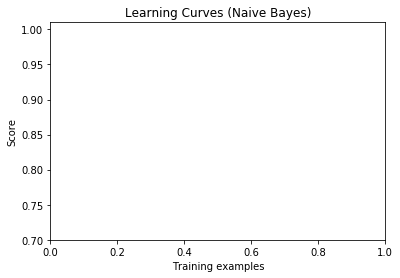

In [54]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# digits = load_digits()
# X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, x, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, x, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [58]:
svm_x = model_dense_layer_output.predict(test_image)

In [59]:
print(clf.predict(svm_x))

[8]


In [18]:
# serialize model to JSON
banglaModel_json = model.to_json()
with open("banglamodel.json", "w") as json_file:
    json_file.write(banglaModel_json)
# serialize weights to HDF5
model.save_weights("banglaModel.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
from keras.models import model_from_json
# load json and create model
json_file = open('banglamodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("banglamodel.h5")
print("Loaded model from disk")

Loaded model from disk


In [20]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 99.58%


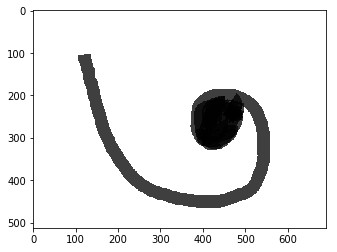

(28, 28)
(1, 1, 28, 28)
[[3.5477847e-06 9.1811927e-07 1.3625142e-07 9.8581505e-01 3.6206729e-09
  4.4938519e-05 1.4112342e-02 3.5308687e-09 2.0704596e-05 2.3199229e-06]]
1/1 [==============================] - 0s
[3]


In [21]:
# Testing a new image
test_image = cv2.imread('/Users/sachaura/Downloads/digits/3_b.png')
plt.imshow(test_image)
plt.show()
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
# Predicting the test image
print((loaded_model.predict(test_image)))

print(loaded_model.predict_classes(test_image))